In [2]:
import sqlite3

# Create and connect to DB
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

# Create table
cursor.execute("""
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    sale_date TEXT,
    product TEXT,
    quantity INTEGER,
    price REAL
)
""")

# Sample data
sales_rows = [
    ("2025-08-01", "Keyboard", 5, 1200),
    ("2025-08-01", "Mouse", 8, 600),
    ("2025-08-02", "Monitor", 2, 8500),
    ("2025-08-02", "Keyboard", 3, 1200),
    ("2025-08-03", "Mouse", 4, 650),
]

# Insert sample data
cursor.executemany("""
INSERT INTO sales (sale_date, product, quantity, price) 
VALUES (?, ?, ?, ?)
""", sales_rows)

conn.commit()
conn.close()


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Connect to DB
conn = sqlite3.connect("sales_data.db")

# SQL query for total qty & revenue
query = """
SELECT 
    product,
    SUM(quantity) AS total_qty,
    SUM(quantity * price) AS revenue
FROM sales
GROUP BY product
"""

df = pd.read_sql_query(query, conn)
conn.close()

# Display table
df


,product,total_qty,revenue
0,Keyboard,8,9600.0
1,Monitor,2,17000.0
2,Mouse,12,7400.0


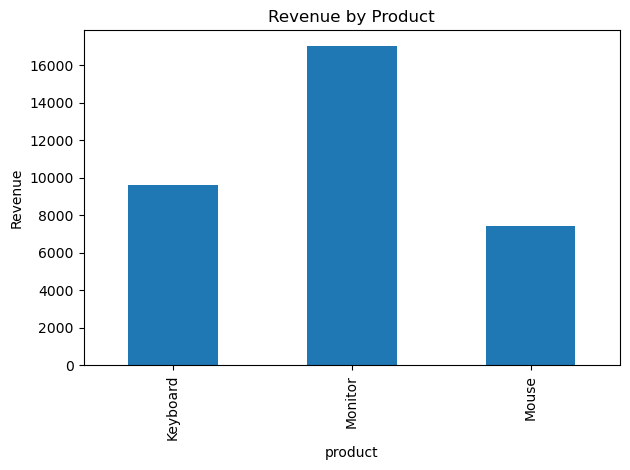

In [4]:
df.plot(kind='bar', x='product', y='revenue', legend=False)
plt.ylabel("Revenue")
plt.title("Revenue by Product")
plt.tight_layout()
plt.savefig("sales_chart.png")  # Save chart
plt.show()